# Section 3.6 Lab: Linear Regression

In [1]:
# install.packages("MASS")
# install.packages("ISLR")

In [2]:
library(MASS)
library(ISLR)

## Simple Linear Regresssion

In [3]:
#fix(Boston)
attach(Boston)
#names(Boston)

* crim : per capita crime rate by town.
* zn : proportion of residential land zoned for lots over 25,000 sq.ft.
* indus : proportion of non-retail business acres per town.
* chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox : nitrogen oxides concentration (parts per 10 million).
* rm : average number of rooms per dwelling.
* age : proportion of owner-occupied units built prior to 1940.
* dis : weighted mean of distances to five Boston employment centres.
* rad : index of accessibility to radial highways.
* tax : full-value property-tax rate per \\$10,000.
* ptratio : pupil-teacher ratio by town.
* black : $1000(Bk - 0.63)^2$ where *Bk* is the proportion of blacks by town. 
* lstat : lower status of the population (percent).
* medv : median value of owner-occupied homes in $1000s.

In [4]:
(lm.fit = lm(medv ~ lstat))


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


The `summary` func gives p-values and standard errors for the coefficients, as well as the R^2 nad F-statistic.

In [5]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


Other pieces of info listed in the model : 

In [6]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Confidence interval for coefficent estimates: 

In [7]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Making predictions:

In [8]:
predict(lm.fit,
        data.frame("lstat" = c(5,10,15)),
        interval = "confidence")

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


The *confidence interval* is used to quantify the uncertainty surrounding the **average** *medv* variable.

In [9]:
predict(lm.fit,
        data.frame("lstat" = c(5,10,15)),
        interval = "prediction")

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


The *prediction interval* is used to quantify the uncertainty surrounding the *medv* for a **particular** prediction.

The difference between each one is the standar error defined by *lwr*,*upr*. This interval in the case of the prediction interval will be wider because of it takes into accoun the variance of the error term. [Source](https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals).


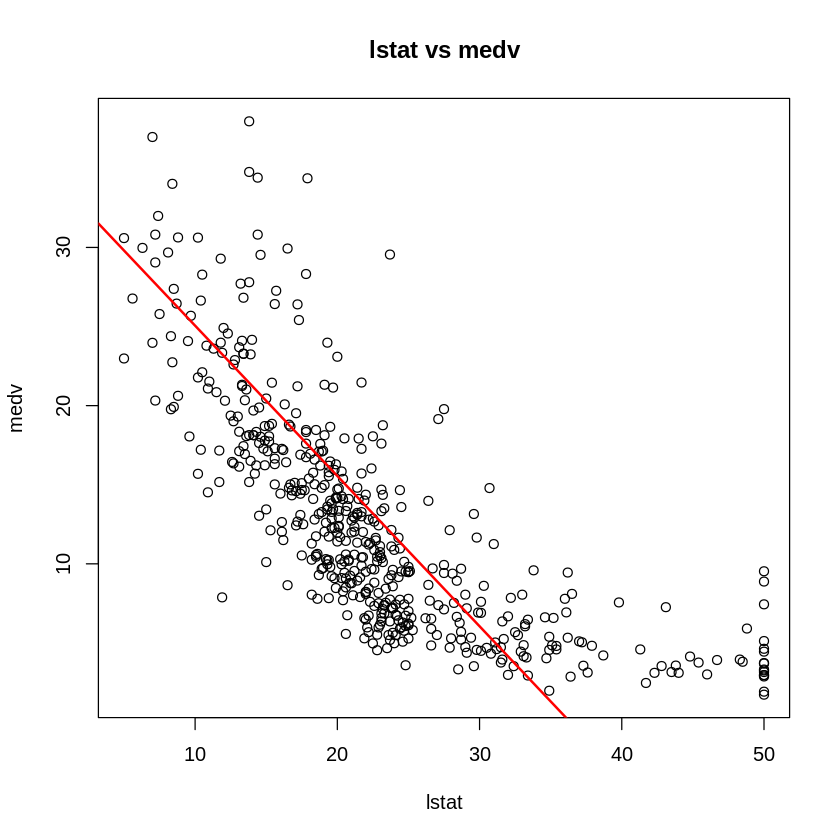

In [10]:
plot(medv,lstat,
     main = "lstat vs medv",
     xlab = "lstat", ylab = "medv" )
abline(lm.fit, col = "red", lwd = 2)

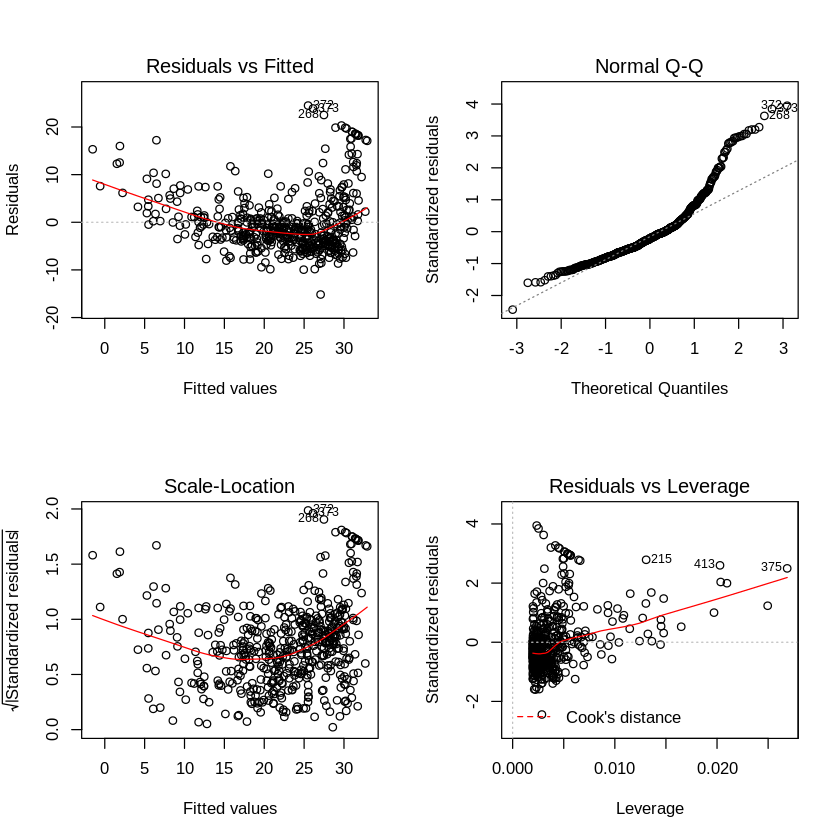

In [11]:
par(mfrow = c(2,2))
plot(lm.fit)

Of course the residuals plots confirm evidence of non-linearity.

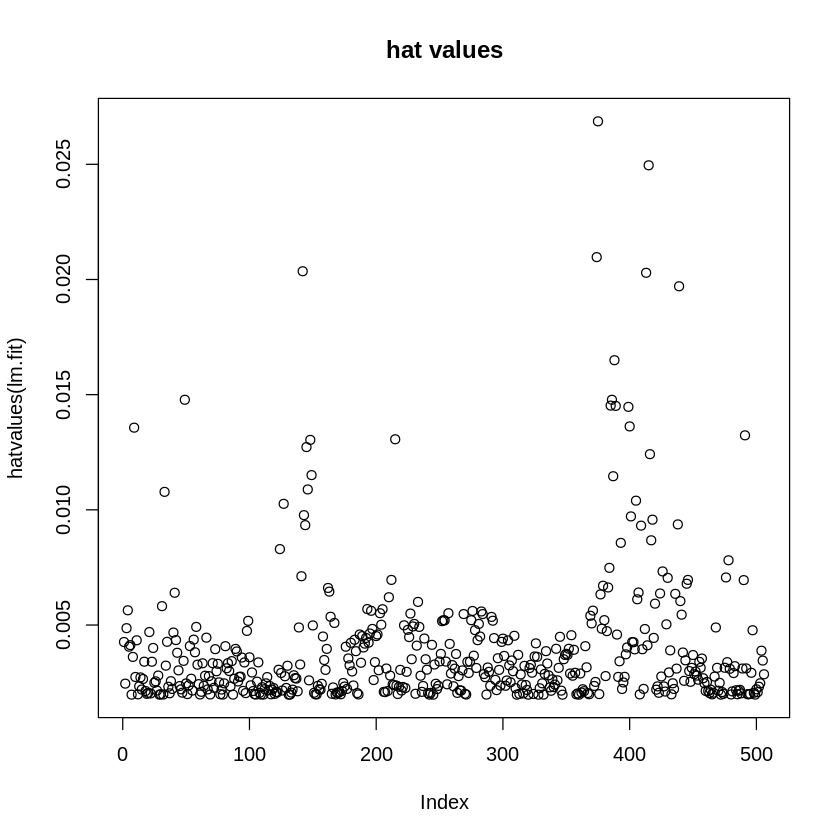

In [12]:
plot(hatvalues(lm.fit), main = "hat values")

In [13]:
which.max(hatvalues(lm.fit))

375 
375

This is the observation with the greater leverage statistic.

## Multiple Linear Regresssion

In [14]:
(lm.fit = lm(medv ~ lstat + age, data = Boston))


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Coefficients:
(Intercept)        lstat          age  
   33.22276     -1.03207      0.03454  


In [15]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [16]:
(lm.fit = lm(medv ~ ., data = Boston))


Call:
lm(formula = medv ~ ., data = Boston)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  3.646e+01   -1.080e-01    4.642e-02    2.056e-02    2.687e+00   -1.777e+01  
         rm          age          dis          rad          tax      ptratio  
  3.810e+00    6.922e-04   -1.476e+00    3.060e-01   -1.233e-02   -9.527e-01  
      black        lstat  
  9.312e-03   -5.248e-01  


In [17]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [18]:
#install.packages("car", dependencies = T) 
library(car) # Companion to Applied Regression

Loading required package: carData


The Variable Inflation Factor (VIF) is usefull for detecting multicollinearity. The VIF is the ratio of the variance of $B_j$ when fitting the full model divided by the variance of $B_j$ when fitted on its own. The smallest possible value of VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.  

In [19]:
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

By the way, most VIFS in this dataset are low to moderate.

For fitting a model using all but one variable:

In [20]:
lm(medv ~ . -age, data = Boston)


Call:
lm(formula = medv ~ . - age, data = Boston)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  36.436927    -0.108006     0.046334     0.020562     2.689026   -17.713540  
         rm          dis          rad          tax      ptratio        black  
   3.814394    -1.478612     0.305786    -0.012329    -0.952211     0.009321  
      lstat  
  -0.523852  


## Interaction Terms

* lstat:age  Interaction between *lstat* and *age*
* lstat\*age  Interaction between *lstat* and *age* plus main effects. So its a shorhand for: *lstat* + *age* + *lstat*:*age*

In [21]:
summary(lm(medv~lstat*age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Non-linear Transformations of the predictors


The function `I(X^2)` is needed for computing $X^2$ since `^` has a special meaning in a formula.

In [22]:
lm.fit2 = lm(medv ~ lstat + I(lstat^2), data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near zero p-value suggest that the quadrating terms leads to an improved model. With `anova()`we can quantify the extent to which the quadratic fit is superior to the linear.

In [23]:
lm.fit = lm(medv ~ lstat, data = Boston)
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


The `anova()` function perfoms a hypothesis testing comparing the two models. The null hypothesis is that the two models fit the data equally well. The alternative hipothesis is that the full model is superior. Here the F-statistic is 135 and the p-value is virtually 0, that provides a clear evidence that the model containing the quadratic term is far superior.


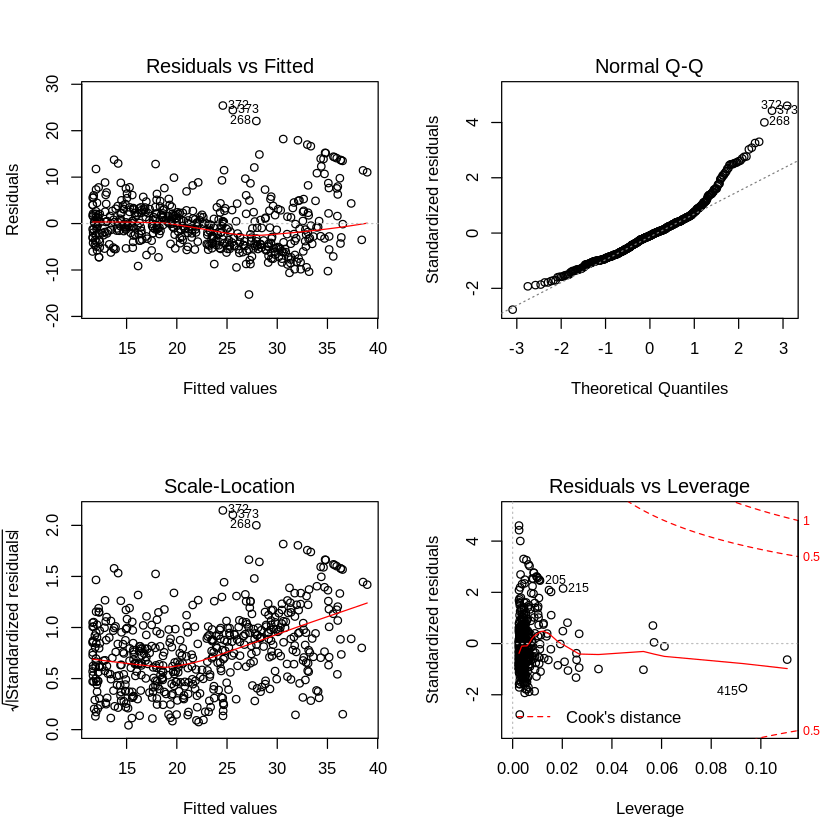

In [24]:
par(mfrow = c(2,2))
plot(lm.fit2)

For high order polynomials we can use the `poly()` function

In [25]:
lm.fit5 = lm(medv ~ poly(lstat,5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggest that additional polynomials terms leads to an improved model.

Of course we can use other transformations, like a log transformation:

In [26]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


## Qualitative Predictors


In [27]:
fix(Carseats)
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

*Shelveloc* is a qualiative predictor for the shelving location -that is, the space within a store in which the car seat is displayed- at each location. *Shelveloc* can take on three possible values: *Bad*, *Medium*, *Good*.

*R* generates dummy variables automatically :

In [28]:
lm.fit=lm(Sales ~.+Income:Advertising+Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

`contrasts()` function returns the coding that *R* uses for dummy variables:

In [29]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficent for *ShelveLocGood* is positive means that a good shelving location is associated with high sales (relative to a bad location). 

*ShelveLocMedium* has a smaller positive coefficent, indicating that a medium shelving location leads to a higher sales than a bad shelving location but lower than a good shelving location.